<a href="https://colab.research.google.com/github/Lomesh2000/driver-drowsiness-detection/blob/Lomesh2000/driver_drowsiness_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import MaxPool2D,Dropout,BatchNormalization,Dense,Conv2D,Flatten
import numpy as np
import glob
from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [2]:
s=Image.open('/content/drive/MyDrive/DL Practice/driver drowsiness detection/data/dataset_new/test/Closed/_719.jpg')

In [3]:
n=np.asarray(s)
n=np.array(n)
n.shape

(90, 92, 3)

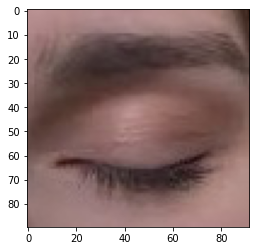

In [4]:
plt.imshow(n)

In [5]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

train_dataset=train_datagen.flow_from_directory(directory='/content/drive/MyDrive/DL Practice/driver drowsiness detection/data/dataset_new/train',
                                                target_size=(24,24),
                                                batch_size=32,
                                                class_mode='categorical')

test_dataset=test_datagen.flow_from_directory('/content/drive/MyDrive/DL Practice/driver drowsiness detection/data/dataset_new/test',
                                             target_size=(24,24),
                                               batch_size=32,
                                               class_mode='categorical')


Found 2467 images belonging to 4 classes.
Found 433 images belonging to 4 classes.


In [6]:
folders=glob.glob('/content/drive/MyDrive/DL Practice/driver drowsiness detection/data/dataset_new/train/*')
len(folders)

4

In [7]:
folders

['/content/drive/MyDrive/DL Practice/driver drowsiness detection/data/dataset_new/train/Closed',
 '/content/drive/MyDrive/DL Practice/driver drowsiness detection/data/dataset_new/train/Open',
 '/content/drive/MyDrive/DL Practice/driver drowsiness detection/data/dataset_new/train/no_yawn',
 '/content/drive/MyDrive/DL Practice/driver drowsiness detection/data/dataset_new/train/yawn']

In [11]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(24,24,3)))

model.add(MaxPool2D(pool_size=(1,1)))

model.add(Conv2D(32,(3,3),activation='relu'))

model.add(MaxPool2D(pool_size=(1,1)))

model.add(Conv2D(64,(3,3),activation='relu'))

model.add(MaxPool2D((1,1)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dropout(0.25))

model.add(Dense(4,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])



In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 22, 22, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 18, 18, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 18, 18, 64)       

In [13]:
model.fit_generator(train_dataset, validation_data=test_dataset,epochs=15,steps_per_epoch=len(train_dataset) ,validation_steps=len(test_dataset))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
78/78 [==============================] - 600s 8s/step - loss: 0.6600 - accuracy: 0.6798 - val_loss: 0.4612 - val_accuracy: 0.7436
Epoch 2/15
78/78 [==============================] - 19s 238ms/step - loss: 0.4005 - accuracy: 0.7941 - val_loss: 0.4453 - val_accuracy: 0.7760
Epoch 3/15
78/78 [==============================] - 18s 236ms/step - loss: 0.3583 - accuracy: 0.8107 - val_loss: 0.4544 - val_accuracy: 0.7783
Epoch 4/15
78/78 [==============================] - 19s 241ms/step - loss: 0.3264 - accuracy: 0.8257 - val_loss: 0.4502 - val_accuracy: 0.7806
Epoch 5/15
78/78 [==============================] - 19s 238ms/step - loss: 0.3106 - accuracy: 0.8346 - val_loss: 0.4226 - val_accuracy: 0.7714
Epoch 6/15
78/78 [==============================] - 19s 238ms/step - loss: 0.3012 - accuracy: 0.8415 - val_loss: 0.3441 - val_accuracy: 0.8360
Epoch 7/15
78/78 [==============================] - 19s 241ms/step - loss: 0.2887 - accuracy: 0.8557 - val_loss: 0.3394 - val_accuracy: 0.8522
E